Basado en:
Data for Chains of Options
Dr. Yves J. Hilpisch | The Python Quants GmbH

In [4]:
import lseg.data as ld
import numpy as np  # NumPy
import pandas as pd  # pandas
import configparser as cp
import matplotlib.pyplot as plt 

In [5]:
ld.open_session()


<lseg.data.session.Definition object at 0x160f6f0d0 {name='workspace'}>

In [6]:
fields = ['PUTCALLIND', 'STRIKE_PRC', 'EXPIR_DATE', 'CF_CLOSE', 'IMP_VOLT']

In [9]:
SPX = ld.get_data('0#AAPL*.EX', fields=fields)

In [10]:
SPX

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
0,/AAPL.DE,<NA>,<NA>,NaT,217.15,<NA>
1,/AAPL0001J5.EX,CALL,0.01,2025-10-17,218.12,<NA>
2,/AAPL0001V5.EX,PUT,0.01,2025-10-17,<NA>,<NA>
3,/AAPL1580J5.EX,CALL,158.0,2025-10-17,60.27,58.3878
4,/AAPL1580V5.EX,PUT,158.0,2025-10-17,0.01,52.463
...,...,...,...,...,...,...
454,/AAPL3600R7.EX,PUT,360.0,2027-06-18,141.9,30.8532
455,/AAPL4000F7.EX,CALL,400.0,2027-06-18,0.88,23.1248
456,/AAPL4000R7.EX,PUT,400.0,2027-06-18,181.9,35.1826
457,/AAPL4800F7.EX,CALL,480.0,2027-06-18,0.2,23.7806


In [11]:
SPX["EXPIR_DATE"].drop_duplicates()

0            NaT
1     2025-10-17
75    2025-11-21
143   2025-12-19
217   2026-03-20
273   2026-06-19
327   2026-09-18
383   2026-12-18
421   2027-06-18
Name: EXPIR_DATE, dtype: datetime64[ns]

In [12]:
SPXI = SPX.iloc[0]['CF_CLOSE']

In [13]:
SPXI

217.15

In [14]:
puts = SPX[SPX['PUTCALLIND'] == 'PUT '].where(SPX["EXPIR_DATE"]=="2025-10-17")
calls = SPX[SPX['PUTCALLIND'] == 'CALL'].where(SPX["EXPIR_DATE"]=="2025-10-17")

In [15]:
limit = 30

In [16]:
puts = puts[abs(puts['STRIKE_PRC'] - SPXI) < limit].dropna()
calls = calls[abs(calls['STRIKE_PRC'] - SPXI) < limit].dropna()

In [17]:
puts

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
34,/AAPL1880V5.EX,PUT,188.0,2025-10-17,0.14,35.7223
36,/AAPL1900V5.EX,PUT,190.0,2025-10-17,0.16,34.1382
38,/AAPL1920V5.EX,PUT,192.0,2025-10-17,0.18,32.5729
40,/AAPL1940V5.EX,PUT,194.0,2025-10-17,0.22,31.6692
42,/AAPL1960V5.EX,PUT,196.0,2025-10-17,0.26,30.2784
44,/AAPL1980V5.EX,PUT,198.0,2025-10-17,0.32,29.0456
46,/AAPL2000V5.EX,PUT,200.0,2025-10-17,0.39,28.0217
48,/AAPL2050V5.EX,PUT,205.0,2025-10-17,0.69,25.4463
50,/AAPL2100V5.EX,PUT,210.0,2025-10-17,1.31,23.0934
52,/AAPL2150V5.EX,PUT,215.0,2025-10-17,2.54,21.5397


In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 33 to 63
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Instrument  16 non-null     string        
 1   PUTCALLIND  16 non-null     string        
 2   STRIKE_PRC  16 non-null     Float64       
 3   EXPIR_DATE  16 non-null     datetime64[ns]
 4   CF_CLOSE    16 non-null     Float64       
 5   IMP_VOLT    16 non-null     Float64       
dtypes: Float64(3), datetime64[ns](1), string(2)
memory usage: 944.0 bytes


In [19]:
calls

,Instrument,PUTCALLIND,STRIKE_PRC,EXPIR_DATE,CF_CLOSE,IMP_VOLT
33,/AAPL1880J5.EX,CALL,188.0,2025-10-17,30.42,36.1924
35,/AAPL1900J5.EX,CALL,190.0,2025-10-17,28.45,34.8735
37,/AAPL1920J5.EX,CALL,192.0,2025-10-17,26.47,33.2477
39,/AAPL1940J5.EX,CALL,194.0,2025-10-17,24.51,32.2838
41,/AAPL1960J5.EX,CALL,196.0,2025-10-17,22.55,30.623
43,/AAPL1980J5.EX,CALL,198.0,2025-10-17,20.61,29.3541
45,/AAPL2000J5.EX,CALL,200.0,2025-10-17,18.69,28.4888
47,/AAPL2050J5.EX,CALL,205.0,2025-10-17,13.99,25.6913
49,/AAPL2100J5.EX,CALL,210.0,2025-10-17,9.61,23.2212
51,/AAPL2150J5.EX,CALL,215.0,2025-10-17,5.84,21.6406


In [23]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

AttributeError: Line2D.set() got an unexpected keyword argument 'mode'

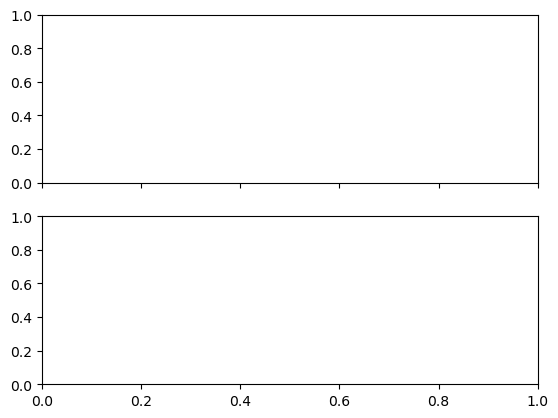

In [28]:
puts.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']].plot(subplots=True,
                                                            mode='lines+markers',
                                                            symbol='circle-dot', size=6)

In [272]:
calls.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']].iplot(subplots=True,
                                                             mode='lines+markers',
                                                            symbol='circle-dot', size=6)

In [25]:
import matplotlib.pyplot as plt 

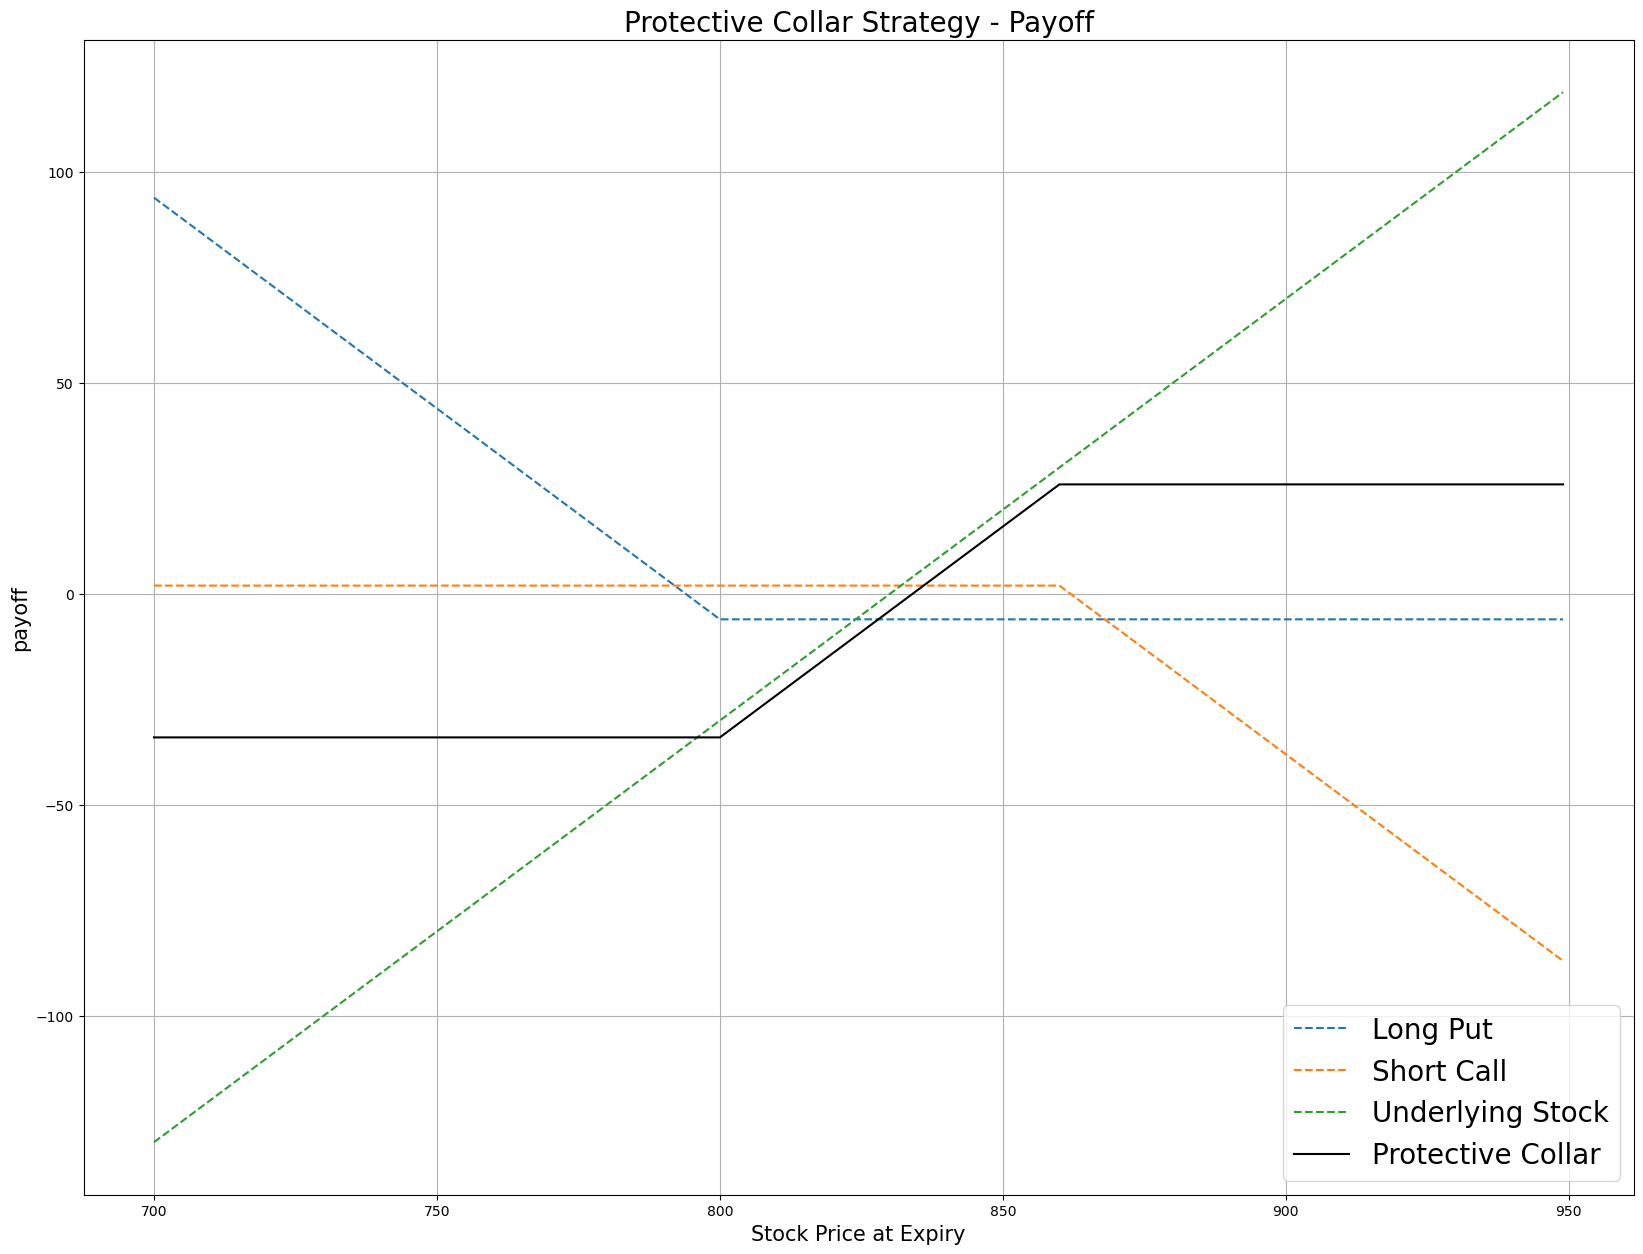

In [26]:
# https://www.quantconnect.com/learning/articles/applied-options/protective-collar
# Protective Collar
price = np.arange(700,950,1)
# assume at time 0, the price of the undelying stock is 830
k_otm_put = 800 # the strike price of OTM put
k_otm_call = 860 # the strike price of OTM call
premium_otm_put = 6 # the premium of OTM put
premium_otm_call = 2 # the premium of OTM call
# payoff for the long put position
payoff_long_put = [max(-premium_otm_put, k_otm_put-i-premium_otm_put) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_otm_call, -(i-k_otm_call-premium_otm_call)) for i in price]
# payoff for the underlying stock
payoff_stock = price - 830
# payoff for the Protective Collar Strategy
payoff = np.sum([payoff_long_put,payoff_short_call,payoff_stock], axis=0)
plt.figure(figsize=(20,15))
plt.plot(price, payoff_long_put, label = 'Long Put',linestyle='--')
plt.plot(price, payoff_short_call, label = 'Short Call',linestyle='--')
plt.plot(price, payoff_stock, label = 'Underlying Stock',linestyle='--')
plt.plot(price, payoff, label = 'Protective Collar',c='black')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Protective Collar Strategy - Payoff',fontsize = 20)
plt.grid(True)

In [ ]:
Apple es 172.56

Compro un Put X 162 vale -2.17
Vender un Call X 180 vale +2.59

Ganando 42 centavos con las opciones


In [ ]:
Si el precio se va 185 
Gano 180 - 172.56 + 42 centavos 

In [ ]:
Si el precio se va a 150
Pierdo 172.56 - 162 + 42 centavos